## Things to consider before choosing a good wine
### by Ajeet Kumar Verma

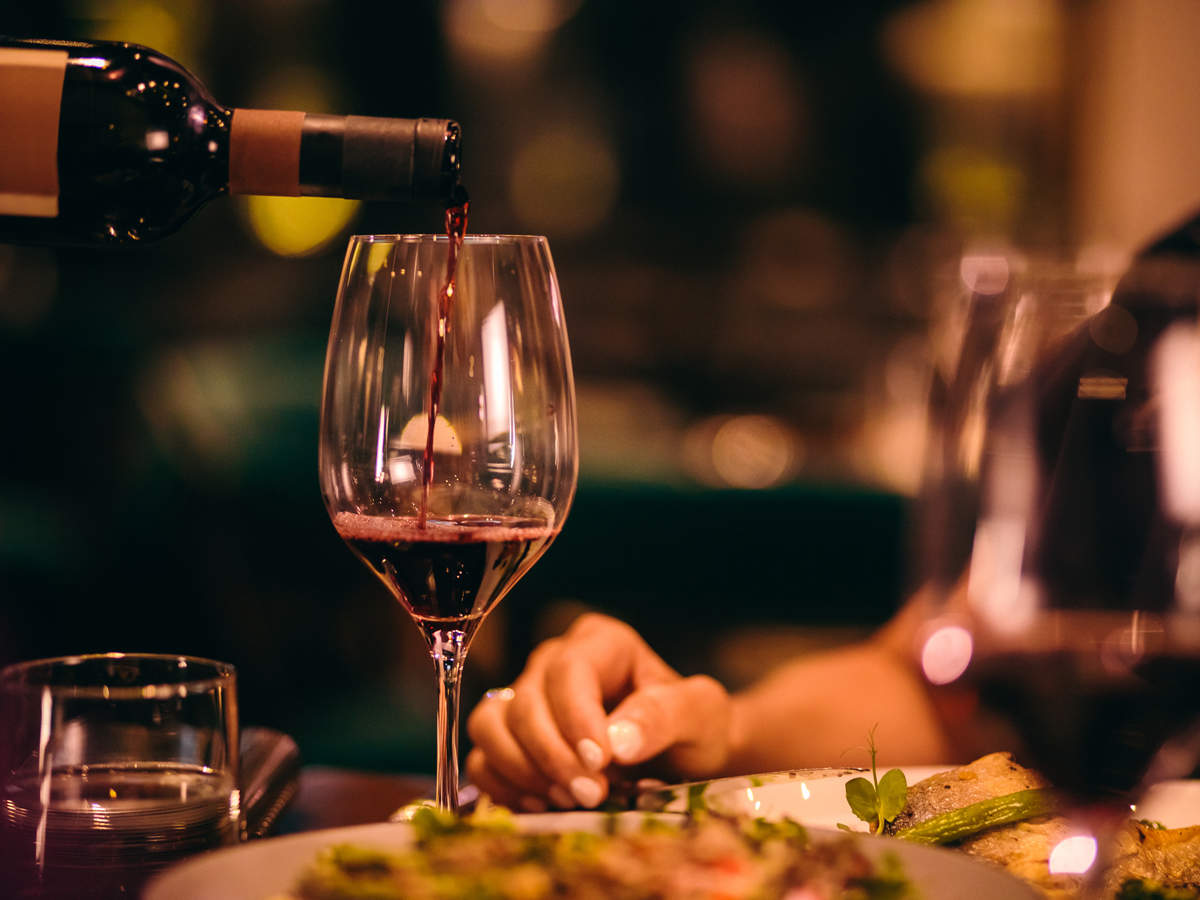

## Introduction

Wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol and carbon dioxide, releasing heat in the process. 

We have taken the data from Kaggle https://www.kaggle.com/zynicide/wine-reviews for the purpose of analysis and to explore different aspects about the wine.
We'll follow the CRISP-DM Process. The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- Business understanding – What does the business need.
- Data understanding – What data do we have / need? Is it clean.
- Data preparation – How do we organize the data for modeling.
- Modeling – What modeling techniques should we apply.
- Evaluation – Which model best meets the business objectives.
- Deployment – How do stakeholders access the results.

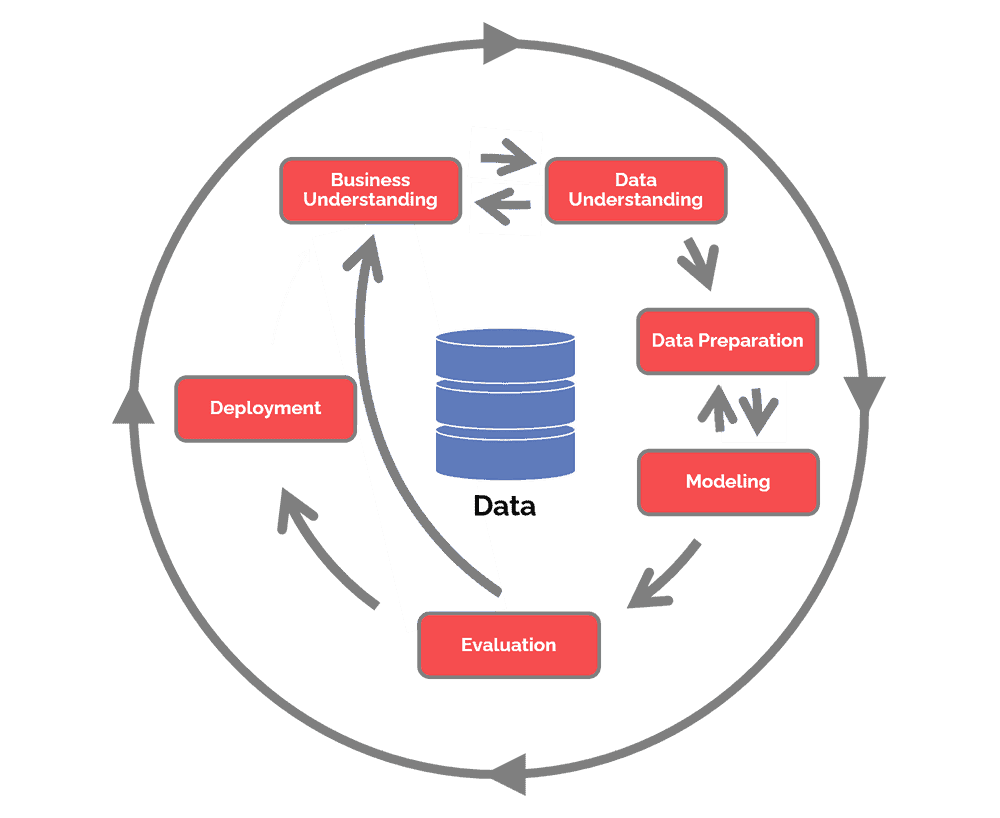

## Business Understanding

One thing that always got my attention is the wine shops or the wine section in a mall where hundreds of shiny & stylish wine bottles are put together very nicely. I'm a wine lover although I don't drink usually. And it comes in different variety (red wine, white wine, Rosé wine, Sparkling wine, and Fortified or Dessert wine, just to name a few.), price and qualities. I always wonder how to choose a good wine from such a huge varity and what things to consider (other than price) before buying one. So here we are going to look at the wine review dataset and we'll try to answer the below questions:

1. the country which produces the best wine?
2. Does the high price means high quality & vice-versa?
3. Are certain varieties of wine of higher quality?
4. What's the best quality of wine in each price bracket?

## Data understanding

The dataset used for this project is the wine review dataset consisting of 14 columns and total 129971 rows.
where each row represent the review information given by a user to a specific wine.
The columns are as follows:
- unnamed: index column
- country: country where the wine is made
- description: description of the wine
- designation: the vineyard within the winery
- points: points given by the reviewer to the wine
- price: wine price
- province: the province where the wine is made
- region_1: the region where the wine is made
- region_2: same like region_1 with more specific address.
- taster_name: reviewer's name
- taster_twitter_handle: reviewer's twitter account 
- title: wine name with the year of made
- variety: type of grapes used to make the wine
- winery: the winery where the wine is made

## Exploratory Data Analysis (EDA)

In [1]:
# import the required libraries

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set()

### Data preparation

In [2]:
# read in the dataset
df = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.count()

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [5]:
df.shape

(129971, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [7]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [9]:
df.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

as we can see, there are 43 unique country in the dataset where 'US' is the most frequent country with 54504 count. and also some rows have missing value in the country column.

In [10]:
df.country.count()

129908

In [11]:
print(f"missing country percentage: {round((df.shape[0]-df.country.count())/df.shape[0]*100, 2)}%")

missing country percentage: 0.05%


In [12]:
df.designation.describe()

count       92506
unique      37979
top       Reserve
freq         2009
Name: designation, dtype: object

In [13]:
print(f"missing designation percentage: {round((df.shape[0]-df.designation.count())/df.shape[0]*100, 2)}%")

missing designation percentage: 28.83%


In [14]:
df.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

the expert tasters rate each on a scale of 80 to 100.

In [15]:
print(f"missing points percentage: {round((df.shape[0]-df.points.count())/df.shape[0]*100, 2)}%")

missing points percentage: 0.0%


In [16]:
df.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

the minimum price of a wine bottle is 4 dollar and the maximum price goes as high as 3300 dollar with average price of 35$

In [17]:
print(f"missing price percentage: {round((df.shape[0]-df.price.count())/df.shape[0]*100, 2)}%")

missing price percentage: 6.92%


In [18]:
df.province.describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

In [19]:
print(f"missing province percentage: {round((df.shape[0]-df.province.count())/df.shape[0]*100, 2)}%")

missing province percentage: 0.05%


In [20]:
df.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

there are total 19 users with the maximun reviews(25514) given by the user Roger Voss 

In [21]:
print(f"missing taster_name percentage: {round((df.shape[0]-df.taster_name.count())/df.shape[0]*100, 2)}%")

missing taster_name percentage: 20.19%


In [22]:
df.taster_twitter_handle.describe()

count          98758
unique            15
top       @vossroger
freq           25514
Name: taster_twitter_handle, dtype: object

there are total 15 twitter handle that reviewed all the wines in the dataset. and @vossroger is the user with the most review of 25514

In [23]:
print(f"missing taster_twitter_handle percentage: {round((df.shape[0]-df.taster_twitter_handle.count())/df.shape[0]*100, 2)}%")

missing taster_twitter_handle percentage: 24.02%


In [24]:
df.title.describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

In [25]:
print(f"missing title percentage: {round((df.shape[0]-df.title.count())/df.shape[0]*100, 2)}%")

missing title percentage: 0.0%


In [26]:
df.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [27]:
print(f"missing variety percentage: {round((df.shape[0]-df.variety.count())/df.shape[0]*100, 2)}%")

missing variety percentage: 0.0%


In [28]:
df.winery.describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

In [29]:
print(f"missing winery percentage: {round((df.shape[0]-df.winery.count())/df.shape[0]*100, 2)}%")

missing winery percentage: 0.0%


In [30]:
# check if rows are duplicated
sum(df.duplicated())

0

### data cleaning and feature engineering

There are some columns which does not add any value for furthur analysis such as 'Unnamed: 0', 'region_2', 'taster_name','taster_twitter_handle', 'designation' so we could drop them.

In [31]:
# make a copy
wine_df = df.copy()

In [32]:
wine_df = wine_df.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

In [33]:
wine_df.head()

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [34]:
wine_df.shape

(129971, 9)

next we can drop the rows which has missing value in any of these columns 'country', 'price', 'variety', 'province'.

In [35]:
wine_df = wine_df.dropna(how='any', subset=['country', 'price', 'variety', 'province'])

In [36]:
wine_df.shape

(120915, 9)

as we can see that the title column also consists of the year. so we can extract it in a seperate column.

In [37]:
wine_df['year'] = wine_df.title.str.extract('(\d+)')

In [38]:
wine_df.year

1         2011
2         2013
3         2013
4         2012
5         2011
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 120915, dtype: object

## Exploratory Data Analysis: Visualization

### 1. the country which produces the best wine?

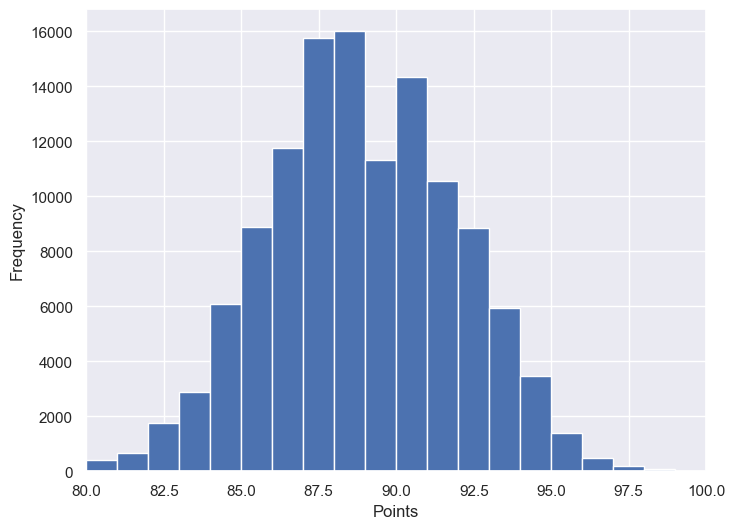

In [39]:
# distribution of points
plt.figure(figsize=(8,6))
bins = np.arange (80, wine_df.points.max(), 1)
plt.hist(data = wine_df, x = 'points', bins = bins)
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');

the points distribution plot follows a normal distribution curve in the range 80-100.

In [40]:
wine_df.country.describe()

count     120915
unique        42
top           US
freq       54265
Name: country, dtype: object

In [41]:
# top 10 wine producing countries
top_countries = wine_df.country.value_counts().head(10)

As we can see above that the US is the top wine producing countries.

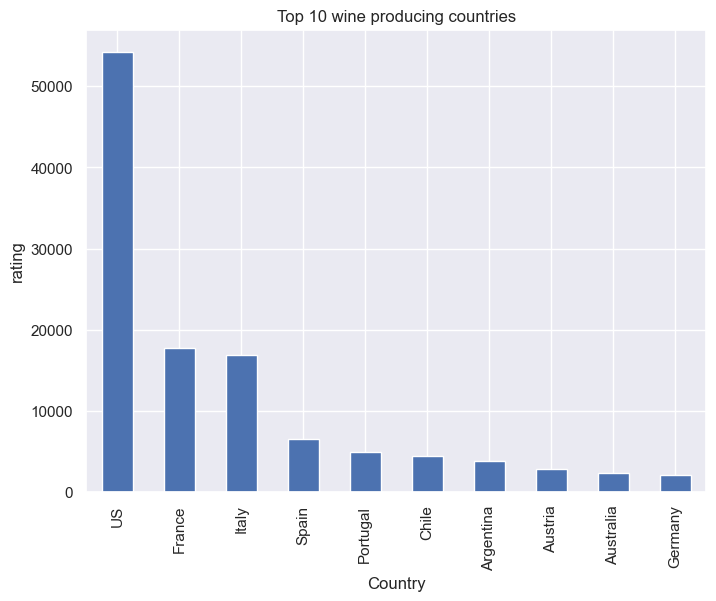

In [42]:
plt.figure(figsize=(8,6))
top_countries.plot(kind='bar')
plt.title('Top 10 wine producing countries')
plt.xlabel('Country')
plt.ylabel('rating');

In [43]:
wine_df.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [44]:
# let's check the top countries which produces the wine of very high score/rating.
high_rating_wine = wine_df.query('points>=95')
high_rating_wine

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006
128271,Spain,"Concentrated to the hilt, with molten black fr...",96,82.0,Northern Spain,Rioja,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza,2005
128682,US,Easy to like a lot now for its terrifically ri...,95,38.0,California,Russian River Valley,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate,2007
128683,US,"Big, powerful, soft, rich and ageable. In othe...",95,90.0,California,Carneros,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude,2006


In [45]:
high_rating_wine.country.value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

In [46]:
# number of wines from each country in the dataset
wine_df.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

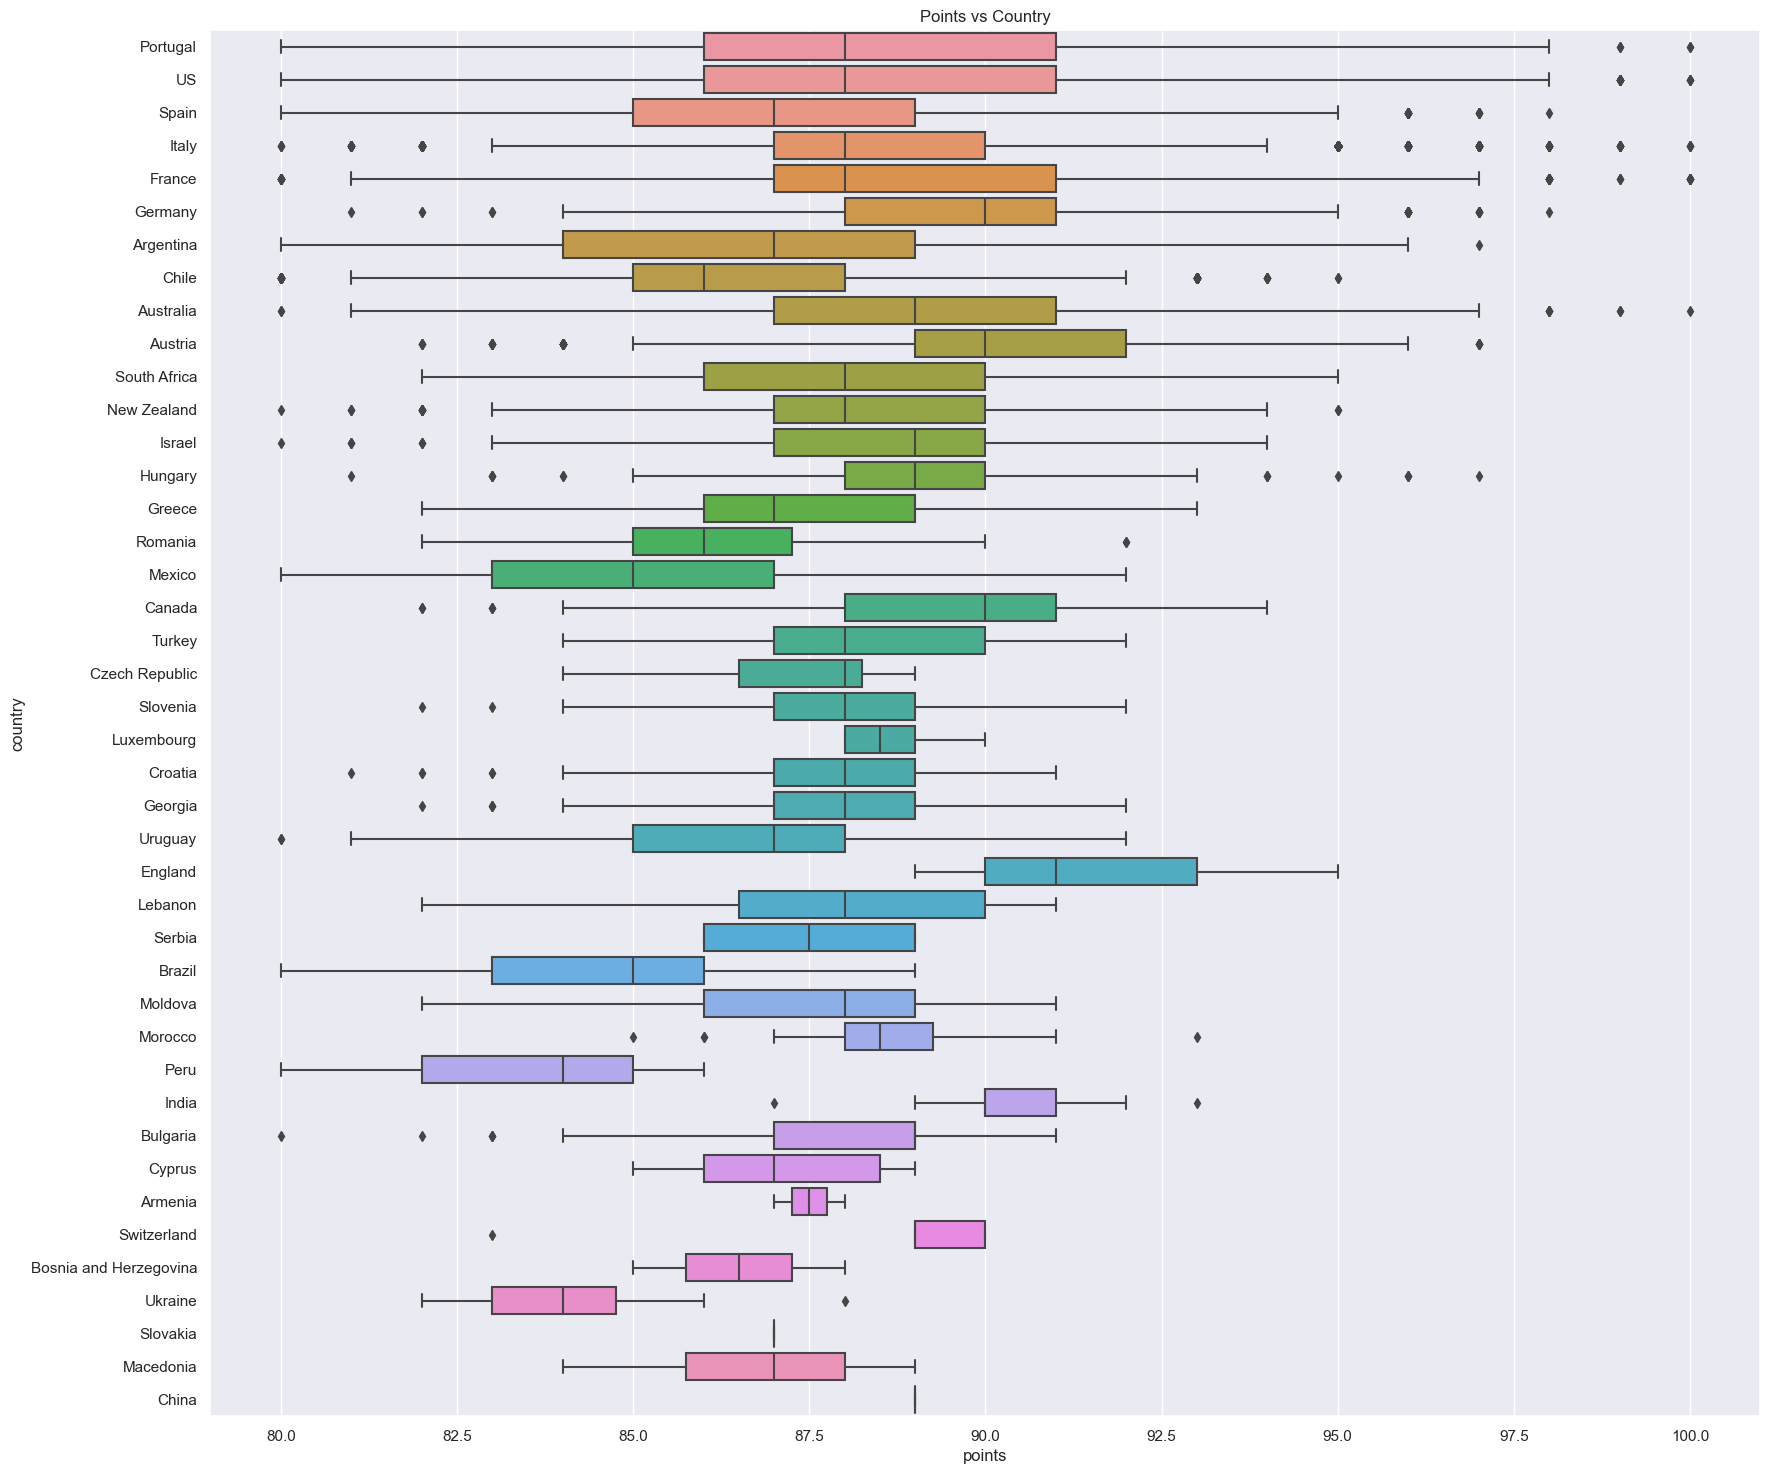

In [47]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = wine_df, x = 'points', y = 'country')
plt.title('Points vs Country')
plt.xlabel('points')
plt.ylabel('country');

from the boxplot above, it's clear that although wines from England has the highest avg. points, the Portugal, the US, Italy, France, & Australia made wines received a maximum score of 100. There are more wines from these countries in the dataset therefore there is a wider range of scores they've received.

### 2. Does the high price means high quality & vice-versa?

Let's take a look at the price distribution of wines.

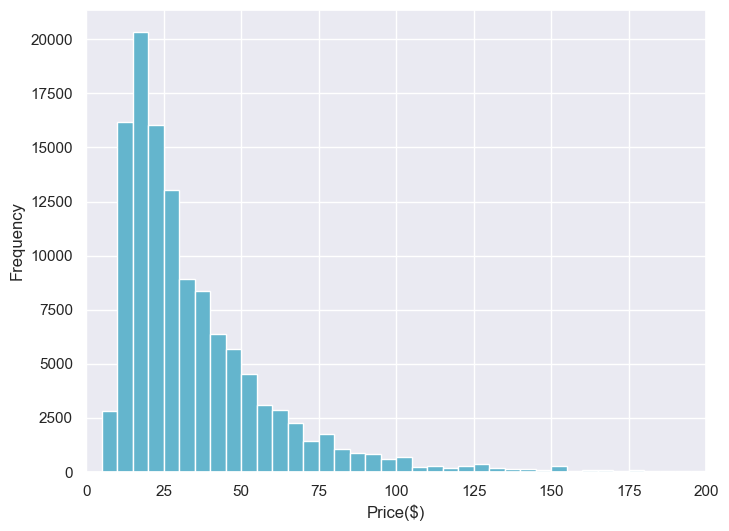

In [48]:
# plot the price distribution
plt.figure(figsize=(8,6))
bins = np.arange (0, wine_df.price.max()+2, 5)
plt.hist(data = wine_df, x = 'price', bins = bins, color ='c')
plt.xlim(0,200) 
plt.xlabel('Price($)')
plt.ylabel('Frequency');

As we can see, price data is highly skewed to the right. Means there are more number of such wines with high price. Let's apply a logarithmic transformation to better understand the distribution.


In [49]:
wine_df.price.describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [50]:
np.log10(wine_df.price.describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

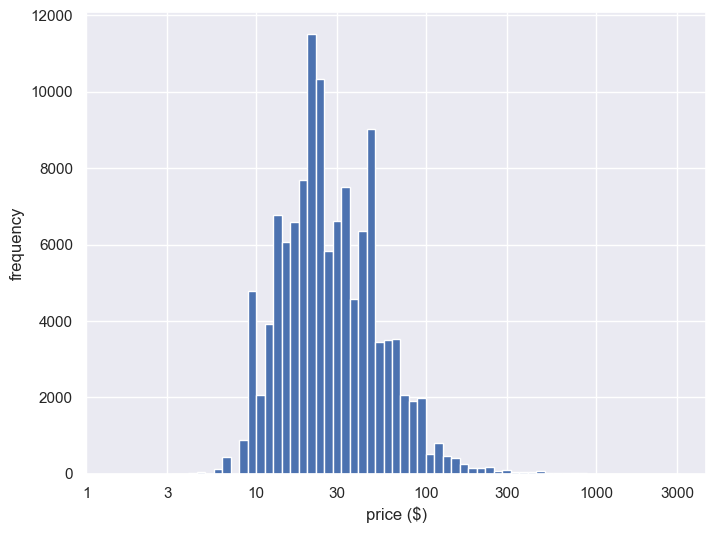

In [51]:
# plotting price distribution on a log scale
plt.figure(figsize=(8,6))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.hist(data = wine_df, x = 'price', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('price ($)')
plt.ylabel('frequency');

Now we see the log-normal distribution. There's a sudden rise at 10 dollar mark, and a peak around 20 dollars. There is 2nd peak around $50.

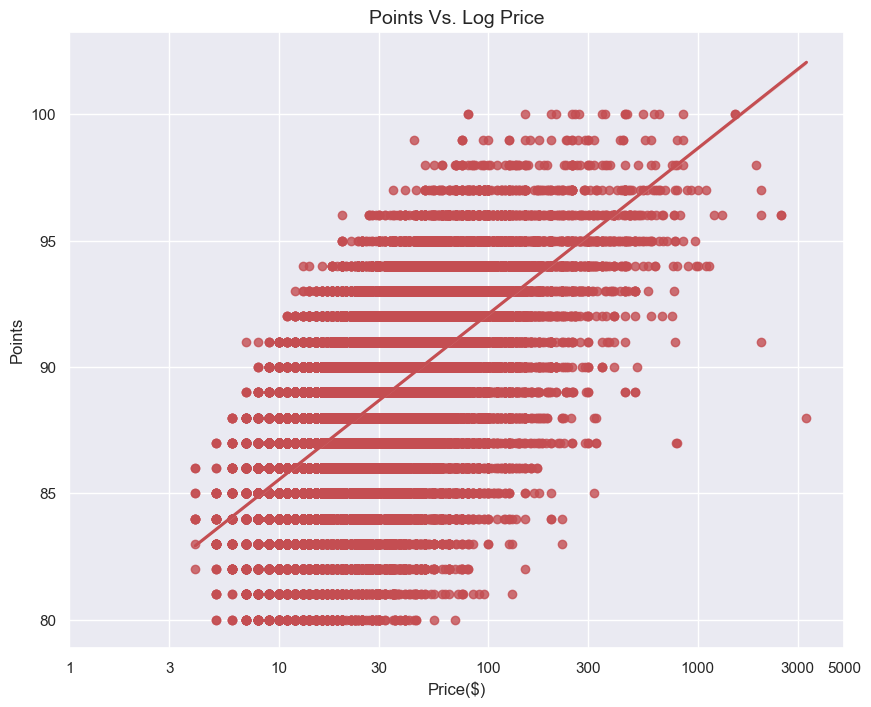

In [52]:
# plot the relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,8))
sns.regplot(x='price', y='points', data=wine_df, color = 'r', logx = True)
plt.title("Points Vs. Log Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 5000], [1, 3, 10, 30, 100, 300, 1000, 3000, 5000])
plt.xlabel("Price($)")
plt.ylabel("Points");

As observed above, there is a positive relationship between points and price, which means the more priced wines are more likely to receive high review/points and vice-versa.

### 3. Are certain varieties of Wine of Better Quality on Average?

In [53]:
wine_df.variety.describe()

count         120915
unique           691
top       Pinot Noir
freq           12785
Name: variety, dtype: object

As we can see, there are total 691 different unique varity which is too much with the varity "Pinot Noir" at the top

In [54]:
# top 10 wines by count
wine_df.variety.value_counts()[:10]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Name: variety, dtype: int64

Pinot Noir and Chardonnay are by far the most popular variety of wine in the dataset.

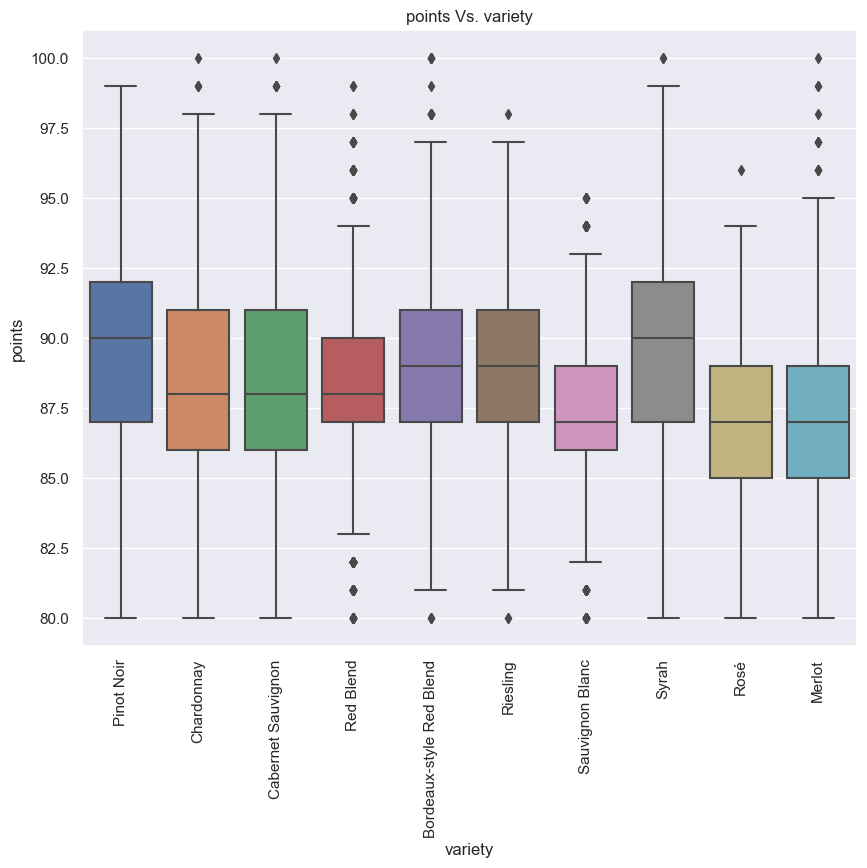

In [55]:
# 10 most frequent wines in dataset by points
plt.figure(figsize=(10,8))
sns.boxplot(data = wine_df, x = 'variety', y = 'points', order = wine_df.variety.value_counts().iloc[:10].index)
plt.title('points Vs. variety')
plt.xlabel('variety')
plt.xticks(rotation=90)
plt.ylabel('points');

**Pinot Noir** is the most popular varity of wine among all other more than 600 varities.
Interestingly this variety is also very good for heart. for further study, Here is an article explains about the health benefits of **Pinot Noir** : https://www.forbes.com/sites/joemicallef/2021/04/15/why-pinot-noir-may-be-the-best-wine-for-your-health/?sh=39c8c63a107e

### 4. Best Wine in Each Price Bracket?

As we have seen from the analysis above that the more money we put, the better quality of wine we get. But not everyone can afford a wine bottle of 2000-3000 dollar. So Now let's the the best quality of wines in all price ranges.

#### wine under $15

In [56]:
cheap_wine = wine_df.query('price<=15')

In [57]:
cheap_wine.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
19136,Spain,"A spectacularly sweet and rich bruiser, and on...",94,14.0,Andalucia,Jerez,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,1827
23974,Portugal,Assobio is from a single vineyard in the Quint...,94,13.0,Douro,NaN,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças,2011
12255,South Africa,This big boy greets us with his deep ruby/blac...,93,15.0,Stellenbosch,NaN,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,Simonsig,1998
129572,France,It's hard to believe it's possible to buy this...,93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
37882,Australia,Writes the book on how to make a wine filled w...,93,15.0,Australia Other,South Eastern Australia,Marquis Philips 2000 Sarah's Blend Red (South ...,Red Blend,Marquis Philips,2000
74042,France,It's hard to believe it's possible to buy this...,93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
52776,US,Uvaggio is making a serious case for Lodi Verm...,93,14.0,California,Lodi,Uvaggio 2009 Vermentino (Lodi),Vermentino,Uvaggio,2009
43193,US,"This is a very sweet, unctuous dessert wine, w...",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,Novy,2006
9609,France,"A rich, Port-like wine that is full and concen...",93,13.0,Southwest France,Cahors,Château Vincens 2011 Prestige Malbec-Merlot (C...,Malbec-Merlot,Château Vincens,2011
59823,US,"This is a very sweet, unctuous dessert wine, w...",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,Novy,2006


the best(cheapest) option with the only 13 dollar is a portugese wine Quinta dos Murças 2011 Assobio Red (Douro) along with a decent score(quality).

#### wine in Between 15 and 30 dollars

In [58]:
wine_15_30 = wine_df.query("price > 15 and price <=30").sort_values(by='points', ascending=False)[:10]
wine_15_30

,country,description,points,price,province,region_1,title,variety,winery,year
54311,Austria,"This wines arrives on tiptoe, citrus-scented a...",96,28.0,Kamptal,NaN,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,2014
81902,US,This is as good as the best from California—te...,96,30.0,Washington,Columbia Valley (WA),Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,Efeste,2009
45992,France,"With its apricot and honeyed flavors, this is ...",96,28.0,Bordeaux,Sauternes,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,2014
102489,US,Even if winemaker Jason Lett tripled the price...,96,27.0,Oregon,Dundee Hills,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,The Eyrie Vineyards,2014
119658,Spain,One of the world's best PX wines is Solera 192...,96,30.0,Andalucia,Montilla-Moriles,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,1927
101580,US,"Superb fruit highlights this tight, sculpted S...",96,20.0,Washington,Columbia Valley (WA),Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,2007
9901,France,A touch of lemon balm adds a breezy freshness ...,96,29.0,Alsace,Alsace,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,Domaines Schlumberger,2014
40309,Italy,This stunning Chianti Classico has an intense ...,96,27.0,Tuscany,Chianti Classico,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,2010
109845,US,"This ultra reserve, made in half bottles only,...",96,30.0,Oregon,Willamette Valley,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,Sineann,2015
54253,US,"Spicy in aroma and mouthfeel, this is a wondro...",96,27.0,California,El Dorado,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,Donkey & Goat,2012


the best option to choose in the range of 15 to 30 dollar with a high score of 96 wine would be the 20 dollar "Rulo 2007 Syrah".

#### wine in Between 30 and 50 dollars

In [59]:
wine_30_50 = wine_df.query("price > 30 and price <=50").sort_values(by='points', ascending=False)[:10]
wine_30_50

,country,description,points,price,province,region_1,title,variety,winery,year
118059,US,"Shows classic, full-throttle notes of tropical...",99,44.0,California,Sonoma Coast,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla,2010
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 2...",98,50.0,Washington,Columbia Valley (WA),Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette,2008
47432,US,This wine shows real first-growth quality in i...,97,50.0,California,Russian River Valley,Williams Selyem 2010 Allen Vineyard Chardonnay...,Chardonnay,Williams Selyem,2010
4504,US,"This wine is insanely good, from a dry-farmed,...",97,50.0,California,Russian River Valley,Limerick Lane 2013 Rocky Knoll Zinfandel (Russ...,Zinfandel,Limerick Lane,2013
114981,US,A seriously top of the heap California Syrah. ...,97,35.0,California,El Dorado,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah,Donkey & Goat,2010
45986,France,"Powered by intense botrytis, this wine is opul...",97,45.0,Bordeaux,Barsac,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet,2014
125831,US,The cold and fog actually helped this Chardonn...,97,50.0,California,Green Valley,Dutton-Goldfield 2010 Dutton Ranch Rued Vineya...,Chardonnay,Dutton-Goldfield,2010
16524,Portugal,"This is a superb blend of aged tawny Ports, bl...",97,40.0,Port,NaN,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate,325
128268,US,A monumental Cabernet that succeeds on every l...,97,50.0,California,Oak Knoll District,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen,2005
89730,France,The heady aromatic scent of fresh tangerine pe...,97,50.0,Alsace,Alsace,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,Riesling,René Muré,2015


the best option to choose in the range of 15 to 30 dollar with a high score of 97 wine would be the 35 dollar "Donkey & Goat 2010 Fenaughty".

#### wine Above $50

In [60]:
high_wine = wine_df.query("price > 50").sort_values(by='points', ascending=False)[:10]
high_wine

,country,description,points,price,province,region_1,title,variety,winery,year
113929,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,2006
111755,France,This is the finest Cheval Blanc for many years...,100,1500.0,Bordeaux,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,2010
89728,France,This latest incarnation of the famous brand is...,100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,2008
123545,US,Initially a rather subdued Frog; as if it has ...,100,80.0,Washington,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,2008
118058,US,This wine dazzles with perfection. Sourced fro...,100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,2007
89729,France,This new release from a great vintage for Char...,100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,2006
45781,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi,2010
111753,France,"Almost black in color, this stunning wine is g...",100,1500.0,Bordeaux,Pauillac,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,2010
111754,Italy,It takes only a few moments before you appreci...,100,270.0,Tuscany,Brunello di Montalcino,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri,2007
42197,Portugal,This is the latest release of what has long be...,100,450.0,Douro,NaN,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,2008


the best option to choose above 50 dollar with a maximum score of 100 wine would be the 80 dollar "Charles Smith 2006 Roya" or "Cayuse 2008 Bionic Frog".

In [61]:
wine_df.query('variety=="Pinot Noir"').sort_values(by='price', ascending=False)

,country,description,points,price,province,region_1,title,variety,winery,year
98380,France,"A superb wine from a great year, this is power...",96,2500.0,Burgundy,La Romanée,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,2010
113564,France,"A wonderfully complete wine, with all the elem...",96,2000.0,Burgundy,La Romanée,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,2005
113581,France,"While it starts austerely, this wine is obviou...",94,1125.0,Burgundy,La Romanée,Domaine du Comte Liger-Belair 2006 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,2006
84820,France,Produced from vines mainly planted in the 1970...,95,973.0,Burgundy,Musigny,Domaine Jacques Prieur 2014 Musigny,Pinot Noir,Domaine Jacques Prieur,2014
65953,France,This structured wine comes from one of the les...,95,650.0,Burgundy,Romanée-St.-Vivant,Louis Latour 2015 Les Quatre Journaux (Romané...,Pinot Noir,Louis Latour,2015
...,...,...,...,...,...,...,...,...,...,...
104627,Chile,"Fresh, minerally red-fruit aromas set up a lig...",86,7.0,Central Valley,NaN,Beach Kite 2012 Pinot Noir (Central Valley),Pinot Noir,Beach Kite,2012
5528,US,"Sturdy and basic, this Pinot Noir has vegetal ...",82,7.0,California,California,Camelot NV Pinot Noir (California),Pinot Noir,Camelot,NaN
92028,US,The best bargain Pinot Noir in the state. It's...,85,7.0,California,California,flipflop 2009 Pinot Noir (California),Pinot Noir,flipflop,2009
79469,Romania,"Bright cherry red in color, it offers aromas o...",86,7.0,Viile Timisului,NaN,Cramele Recas 2013 Dreambird Pinot Noir (Viile...,Pinot Noir,Cramele Recas,2013


## Business Insights:

The medium blog post about the findings of this project can be found her at https://medium.com/@ajeet214/things-to-consider-before-choosing-a-good-wine-50d0f3e4e7c0

## Conclusions

There are a very wide variety of wines available from the very cheap to very expensive wines. In this we've found very interesting facts about chossing a good wine keeping in mind the budget you have and the quality you're looking for. On average
England makes awesome wine, But if you want a bottle with a maximum rating of 100, you can go for other optinos like France, Italy, Portugal, the US, or Australia.
Price is related to quality. However, if you know where to look for and how to choose, you can bag as low as  $4 wine with the  score of only 3 points below a 3300 dollar super expensive bottle.
All varieties of wine are fair game, but my bet's on the Pinot Noir.
There is a perfect wine for every situation and every budget, with clear standout performers in each bracket.
Further work could include more feature engineering and text processing, sentiment analysis and other text related predictive modelling.

References:

- https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv
- https://en.wikipedia.org/wiki/Wine
- https://www.winemag.com
- https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string
- https://www.datascience-pm.com/crisp-dm-2/
- https://towardsdatascience.com/beautify-coronavirus-bar-charts-ac636d314d98
- https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha
- http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
- https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
- https://www.datacamp.com/community/tutorials/wordcloud-python
- https://worldpopulationreview.com/country-rankings/wine-producing-countries
- https://stackoverflow.com/questions/20443846/python-pil-nameerror-global-name-image-is-not-defined
- https://www.geeksforgeeks.org/python-docstrings/
- https://www.winemag.com/ratings/ 
- https://www.forbes.com/sites/joemicallef/2021/04/15/why-pinot-noir-may-be-the-best-wine-for-your-health/?sh=39c8c63a107e